# Some cars production-sales info

In [1]:
import pandas as pd
from datetime import datetime, date, timedelta
import re
import numpy as np
import time
import sqlalchemy as sa

import locale
locale.setlocale(locale.LC_TIME, 'en_US.UTF-8')

print(locale.getlocale())
%run '../serv_energy.py'

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

%matplotlib notebook

eng_co=sa.create_engine('sqlite+pysqlite:///cars.sqlite3') #, echo=True)

('ru_RU', 'UTF-8')


In [2]:
pdfCarsSales=FuelsDataFrame(pd.read_sql('sales_ru', con=eng_co))
pdfCarsProd=FuelsDataFrame(pd.read_sql('production_ru', con=eng_co))

lst_sl=set(pdfCarsSales['Model'].unique().tolist())
lst_pr=set(pdfCarsProd['Model'].unique().tolist())

print(pdfCarsSales['Model'].unique().tolist())
print(pdfCarsProd['Model'].unique().tolist())
print()
print(lst_pr-lst_sl)

['Saab', 'BMW', 'Toyota', 'Jeep', 'Seat', 'Peugeot', 'Porsche', 'Chrysler', 'Hyundai', 'Mitsubishi', 'Lifan', 'ГАЗ', 'Opel', 'Lada', 'GreatWall', 'SsangYong', 'Jaguar', 'Hummer', 'Audi', 'Citroen', 'Ford', 'Suzuki', 'Vortex', 'Dodge', 'Mazda', 'Chevrolet', 'Isuzu', 'Renault', 'УАЗ', 'Иж', 'Minerva', 'Geely', 'Fiat', 'Subaru', 'BYD', 'Honda', 'Iveco', 'Skoda', 'ТагАЗ', 'Volkswagen', 'Kia', 'ЗАЗ', 'Infiniti', 'Lexus', 'Volvo', 'Mercedes-Benz', 'Cadillac', 'Nissan', 'LandRover', 'Daewoo', 'Chery', 'AlfaRomeo', 'Богдан', 'Haima', 'BAW', 'Foton', 'Smart', 'FAW', 'Luxgen', 'ChangAn', 'Brilliance', 'Acura', 'JAC', 'Datsun', 'Haval', 'Emgrand', 'DongFeng', 'Zotye', 'Ravon', 'Genesis', 'Hawtai', 'Dacia']
['Nissan', 'Opel', 'Renault', 'Scania', 'Toyota', 'БЗКТ', 'BMW', 'Бронто', 'ГАЗ', 'ЗИЛ', 'Volvo', 'Chevrolet', 'Fiat', 'Ford', 'Hyundai', 'Kia', 'Lada', 'КамАЗ', 'ЛиАЗ', 'НефАЗ', 'ПАЗ', 'Урал', 'ТагАЗ', 'SsangYong', 'УАЗ', 'Geely', 'ГолАЗ', 'КаВЗ', 'Волжанин', 'Lifan', 'Cadillac', 'Peugeot', 'I

In [3]:
dctWhose={'Acura':'jp', 'AlfaRomeo':'ita', 'Audi':'ger', 'BAW':'ch', 'BMW':'ger', 'BYD':'ch', 
          'Brilliance':'ch', 'Cadillac':'usa', 'ChangAn':'ch', 'Chery':'ch', 
          'Chevrolet':'usa', 'Chrysler':'usa', 'Citroen':'fra', 'Dacia':'ro', 'Daewoo':'kor', 'Datsun':'kor', 
          'Dodge':'usa', 'DongFeng':'ch', 'Emgrand':'ch', 
          'FAW':'ch', 'Fiat':'ita', 'Ford':'usa', 'Foton':'ch', 'Geely':'ch', 'Genesis':'kor', 'GreatWall':'ch', 
          'Haima':'ch', 'Haval':'ch', 'Hawtai':'ch', 'Honda':'jp', 
          'Hummer':'usa', 'Hyundai':'kor', 'Infiniti':'jp', 'Isuzu':'jp', 'Iveco':'ita', 'JAC':'ch', 'Jaguar':'gb', 
          'Jeep':'usa', 'Kia':'kor', 'Lada':'ru', 'LandRover':'gb', 
          'Lexus':'jp', 'Lifan':'ch', 'Luxgen':'ch', 'Mazda':'jp', 'Mercedes-Benz':'ger', 'Minerva':'bel', 
          'Mitsubishi':'jp', 'Nissan':'jp', 'Opel':'ger', 'Peugeot':'fra', 
          'Porsche':'ger', 'Ravon':'uzb', 'Renault':'fra', 'Saab':'swe', 'Seat':'spa', 'Skoda':'che', 'Smart':'ger', 
          'SsangYong':'kor', 'Subaru':'jp', 'Suzuki':'jp', 'Toyota':'jp', 
          'Volkswagen':'ger', 'Volvo':'swe', 'Vortex':'ch', 'Zotye':'ch', 'Богдан':'ukr', 'ГАЗ':'ru', 
          'ЗАЗ':'ukr', 'Иж':'ru', 'ТагАЗ':'ru', 'УАЗ':'ru', 
          'Komatsu':'jp', 'Бронто':'ru', 'ГолАЗ':'ru', 'ЗИЛ':'ru', 'ВИС':'ru', 'Тролза':'ru', 
          'Тонар':'ru', 'Урал':'ru', 'БЗКТ':'ru', 'MAN':'ger', 'Scania':'swe', 'Волжанин':'ru', 
          'MG':'ch', 'КаВЗ':'ru', 'КамАЗ':'ru', 'НефАЗ':'ru', 'ПАЗ':'ru', 'Caterpillar':'usa', 'ЛиАЗ':'ru'}

setEuroHigh={'AlfaRomeo', 'Audi', 'BMW', 'Jaguar', 'Mercedes-Benz', 'Minerva', 'Porsche', 'Saab', 'Smart', 
             'Volvo', 'LandRover'}
setTruck={'MAN', 'Caterpillar', 'Scania', 'ГолАЗ', 'Тролза', 'Тонар', 'Урал', 
         'БЗКТ', 'Волжанин', 'КаВЗ', 'КамАЗ', 'НефАЗ', 'ПАЗ', 'Caterpillar', 'ЛиАЗ'}

setTruckKom={'Iveco', 'Isuzu', 'Komatsu', 'ЗИЛ', 'ГАЗ'}

setEuroMiddle={'Chevrolet', 'Citroen', 'Dacia', 'Fiat', 'Ford', 'Renault', 'Seat', 'Skoda', 
               'Volkswagen', 'Opel', 'Peugeot'}
setJapanHigh={'Acura', 'Honda', 'Infiniti', 'Lexus', 'Toyota', 'Genesis'}
setJapanMiddle={'Mazda', 'Nissan', 'Subaru', 'Suzuki', 'Mitsubishi'}
setKorea={k for (k, v) in dctWhose.items() if v == 'kor' if k not in setJapanHigh}
setChina ={k for (k, v) in dctWhose.items() if v == 'ch'}
setUSA={'Hummer', 'Chrysler', 'Cadillac', 'Dodge', 'Jeep'}
setOther ={k for (k, v) in dctWhose.items() if k not in setEuroHigh | setTruck | setEuroMiddle | setJapanHigh | setJapanMiddle | setKorea | setChina | setUSA}

#print(setKorea)
#print(setChina)
#print(setOther)

In [4]:
def grouping1(x):
    if x in setEuroHigh | setJapanHigh | setUSA:
        return 'rich'
    if x in setTruck:
        return 'truck'
    if x in setEuroMiddle | setJapanMiddle | setKorea:
        return 'middle'
    if x in setTruckKom:
        return 'truck_kom'
    #if x in setChina:
    #    return 'china'
    return 'rus-ukr-uz'

locale.setlocale(locale.LC_TIME, 'en_US.UTF-8')


pdfCarsSales['type']=pdfCarsSales['Model'].apply(grouping1)
pdfCarsSales['country']=pdfCarsSales['Model'].apply(lambda x: dctWhose[x])

<IPython.core.display.Javascript object>


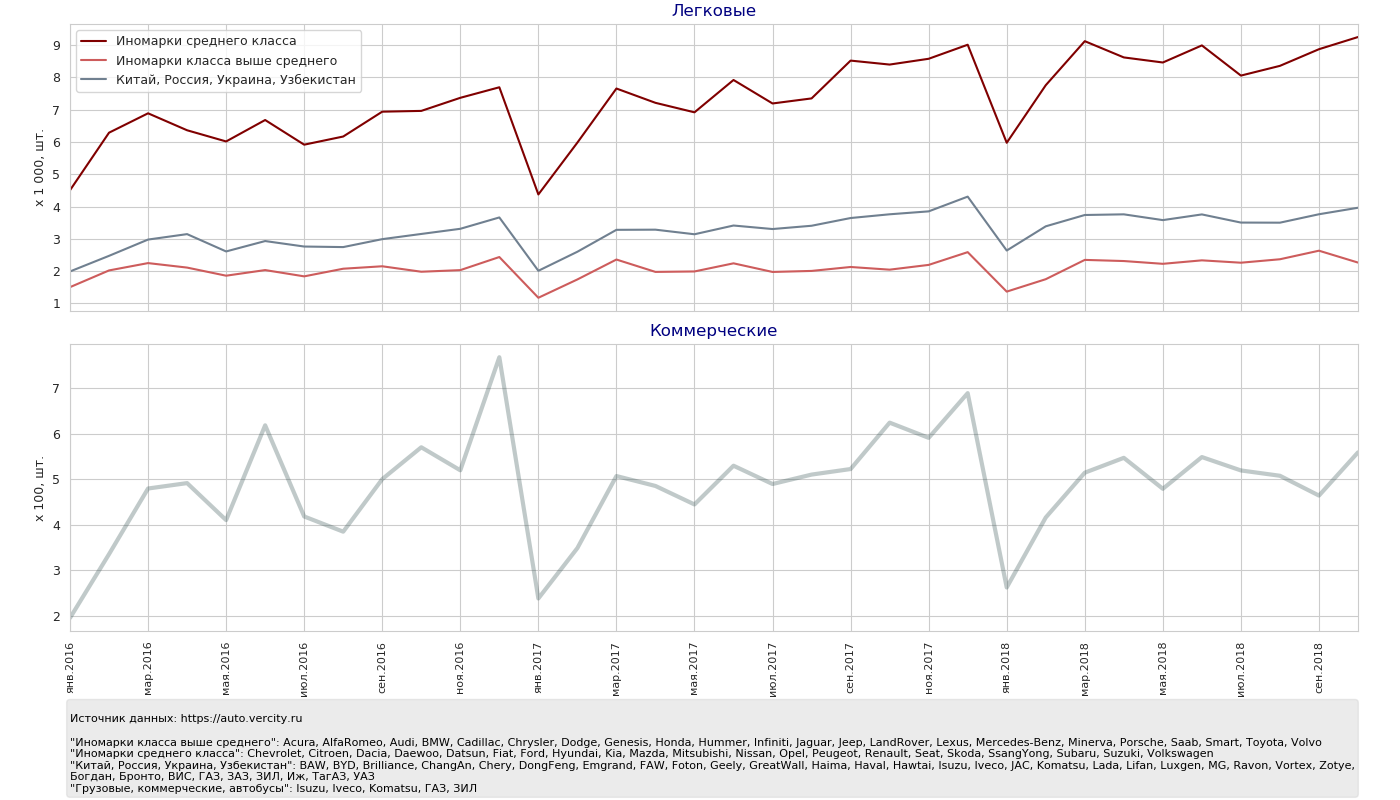

/home/egor/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


(Timestamp('2016-01-01 00:00:00'), '2018-10-01')


In [5]:
%matplotlib notebook

locale.setlocale(locale.LC_TIME, 'en_US.UTF-8')

sns.set_style('whitegrid')
#sns.set_style('dark')

iStartYear=2016
xlim=(pd.Timestamp('{year}-01-01'.format(year=iStartYear)), datetime.now())
xlim=(pd.Timestamp('{year}-01-01'.format(year=iStartYear)), '{year}-{month}-01'.format(year=2018, month=10))

pdf_4group=FuelsDataFrame(pdfCarsSales.reset_index().rename(columns={'date':'Date'})).set_index('Date').index_to_datetime()
pdf_4group=pdf_4group[pdf_4group.index.year >=iStartYear]
pdf_pers=pdf_4group[pdf_4group['type'].isin(['middle', 'rich', 'rus-ukr-uz'])].groupby([pd.Grouper(freq='M'), 'type'])['Count'].sum().unstack()/10e3
pdf_com=pdf_4group[pdf_4group['type'].isin(['truck_kom', 'truck'])].groupby([pd.Grouper(freq='M'), 'type'])['Count'].sum().unstack()/10e2

pdf_pers.rename(columns={'middle':'Иномарки среднего класса', 'rich':'Иномарки класса выше среднего', 'rus-ukr-uz':'Китай, Россия, Украина, Узбекистан'}, inplace=True)


locale.setlocale(locale.LC_TIME, 'ru_RU.UTF-8')


fig_sale_ca, (ax_s2, ax_s3, axd, ax_t)=plt.subplots(figsize=(14,8), nrows=4, ncols=1, sharex=False, 
                                                      gridspec_kw={'height_ratios':[7, 7, 0.3, 2], 
                                                                   'hspace':0.2, 'wspace':0, 'left':0.05, 'top':0.97, 
                                                                  'bottom':0.01, 'right':0.97})


#ax_s1.get_shared_x_axes().join(ax_s1, ax_s2)
#ax_s2.get_shared_x_axes().join(ax_s2, ax_s3)
ax_t.axis('off')

lstMiddle=list(setEuroMiddle | setJapanMiddle | setKorea)
lstMiddle.sort()
lstRich=list(setEuroHigh | setJapanHigh | setUSA)
lstRich.sort()
lstTrucks=list(setTruck)
lstTrucks.sort()
lstTrucksKom=list(setTruckKom)
lstTrucksKom.sort()

lstOther=list(setOther | setChina)
lstOther.sort()

strText='''
Источник данных: https://auto.vercity.ru 

"Иномарки класса выше среднего": {rich}
"Иномарки среднего класса": {middle} 
"Китай, Россия, Украина, Узбекистан": {ru}
"Грузовые, коммерческие, автобусы": {trucks}'''.format(middle=', '.join(lstMiddle), rich=', '.join(lstRich), 
                                                        trucks=', '.join(lstTrucksKom), ru=', '.join(lstOther))

ax_t.text(0, 0, strText, fontsize=8, color='black', wrap=True, 
          bbox=dict(boxstyle='round', color='silver', alpha=0.3))
#=======================================================
# for Personal cars
pdf_pers.plot.line(ax=ax_s2, legend=True, xlim=xlim, color=['maroon', 'indianred', 'slategray'])

ax_s2.set_title('Легковые', fontsize=12, color='navy')
ax_s2.set_ylabel('x 1 000, шт.', fontsize=9)
ax_s2.set_xlabel('', fontsize=9)

#=======================================================
pdf_com.plot.line(ax=ax_s3, legend=False, color='darkslategray', xlim=xlim, grid=True, lw=3, alpha=0.3)

#pdfTruck_trend=seasonal_decompose(pdf_com, model='additive', freq=12).trend
#pdfTruck_trend.plot.line(ax=ax_s3, legend=False, color='darkslategray', grid=True, lw=1, xlim=xlim)
ax_s3.set_title('Коммерческие', fontsize=12, color='navy')
ax_s3.set_ylabel('x 100, шт.', fontsize=9)
ax_s3.set_xlabel('', fontsize=8)
#========================================================

ax_s2.legend(fontsize=9)

ax_s2.tick_params(axis='both', which='major', labelsize=9)
ax_s3.tick_params(axis='both', which='major', labelsize=9)

ax_s2.set_xticks(ticks=pdf_com.index.tolist()[::2])
ax_s3.set_xticks(ticks=pdf_com.index.tolist()[::2])
ax_s2.xaxis.set_major_formatter(plt.NullFormatter())
ax_s2.xaxis.set_minor_formatter(plt.NullFormatter())
ax_s3.xaxis.set_minor_formatter(plt.NullFormatter())

ax_s3.set_xticklabels(pdf_com.index.strftime('%b.%Y')[::2], rotation=90, fontsize=8)



axd.remove()
#plt.subplots_adjust(wspace=0.1)
plt.tight_layout()
plt.show();
plt.savefig(r'/home/egor/Изображения/car_sales_ru.png');

print(xlim)

<IPython.core.display.Javascript object>


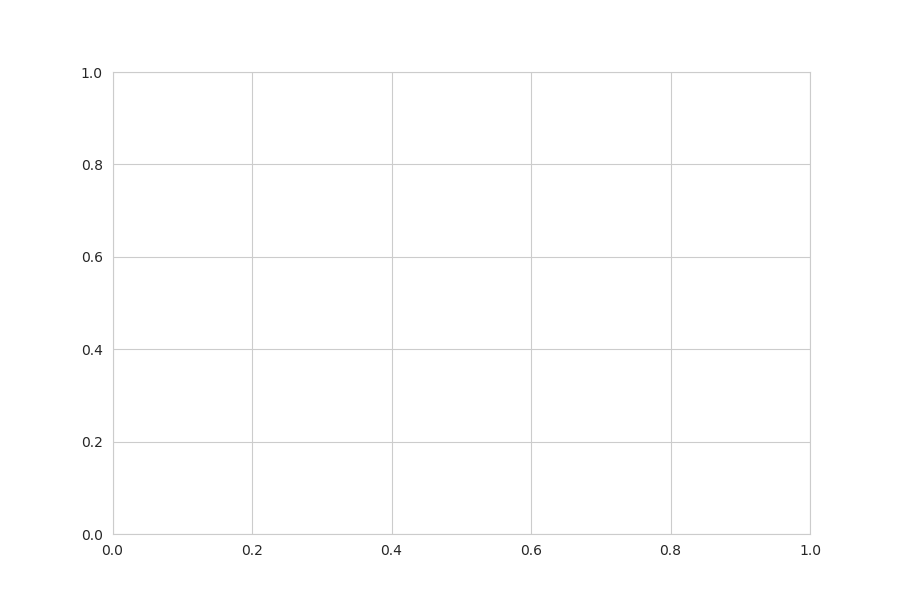

ValueError: time data 'Apr-2010' does not match format '%b-%Y' (match)

In [7]:
setCarSharing=['Hyundai', 'Kia', 'Lada', 'Lifan', 'Renault','Smart', 'Volkswagen']
setCarSharing.sort()

def grouping2(x):
    if x in setCarSharing:
        return 'car sharing'
    else:
        return 'other'

#fig_sale_csh, (ax_csh1, ax_chs2)=plt.subplots(figsize=(9,6), nrows=2, ncols=1, sharex=True)
fig_sale_csh, ax_chs2=plt.subplots(figsize=(9,6))

#st=fig_sale_csh.suptitle('Продажи авто в РФ', fontsize=12, color='maroon')

#pdfDrawAll.plot.line(ax=ax_csh1, legend=False, color='navy', grid=True, fontsize=10, lw=3, alpha=0.3)

#pdfDrawAll_trend=seasonal_decompose(pdfDrawAll, model='additive', freq=12).trend
#pdfDrawAll_trend.plot.line(ax=ax_csh1, legend=False, color='navy', grid=True, fontsize=10, lw=1)

#ax_csh1.set_title('Всего', fontsize=10)
#ax_csh1.set_ylabel('x 10 000, шт.', fontsize=8)

pdfCarsSales['ca_she']=pdfCarsSales['Model'].apply(grouping2)
grpS1=pdfCarsSales.groupby(['ca_she', 'date'])
pdfCaShe=FuelsDataFrame(grpS1['Count'].sum().reset_index().rename(columns={'date':'Date'})).set_index('Date')
pdfCaShe.index_to_datetime().sort_index(inplace=True)

pdfCaSheDr=pdfCaShe.loc[(pdfCaShe.index.year>=iStartYear) & (pdfCaShe['ca_she'] == 'car sharing'), ('Count')]/1e3
pdfCaSheDr.plot.line(ax=ax_chs2, legend=False, color='orange', grid=True, lw=3, alpha=0.3)
#print(pdfCaSheDr)

pdfCaSheO=pdfCaShe.loc[(pdfCaShe.index.year>=iStartYear) & (pdfCaShe['ca_she'] == 'other'), ('Count')]/1e3
pdfCaSheO.plot.line(ax=ax_chs2, legend=False, color='teal', grid=True, lw=3, alpha=0.3)


ax_chs2.set_title('Продажи авто в РФ', fontsize=12, color='maroon')
ax_chs2.set_ylabel('x 1 000, шт.', fontsize=8)

ax_chs2.tick_params(axis='both', which='major', labelsize=8)
#ax_csh1.tick_params(axis='both', which='major', labelsize=8)

cashe_pt=mpatches.Patch(color='orange', label='"Каршеринговые" ({})'.format(', '.join(setCarSharing)))
other_pt=mpatches.Patch(color='teal', label='Остальные')

ax_chs2.legend(handles=[cashe_pt, other_pt], fontsize=7)
ax_chs2.set_xlabel('Дата, по месяцам', fontsize=8)

fig_sale_csh.tight_layout()

plt.show();
plt.savefig(r'/home/egor/Изображения/car_sales_carsharing.png')